# Image diff 

In [1]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage import color
from skimage import util

import matplotlib.pyplot as plt


In [2]:
baseline = io.imread('data/IMG_0940.JPG')
baseline_gray =  color.rgb2gray(baseline)

obj = io.imread('data/IMG_0941.JPG')
obj_gray =  color.rgb2gray(obj)


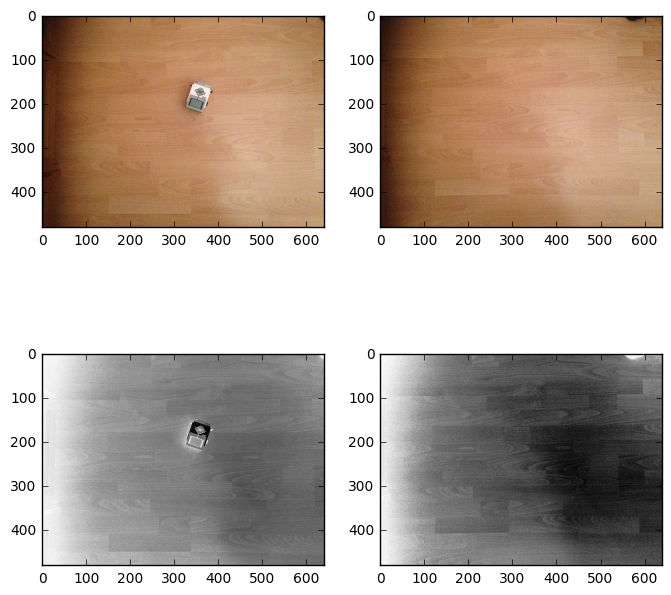

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
ax1.imshow(obj, cmap='Greys')
ax2.imshow(baseline, cmap='Greys')
ax3.imshow(obj_gray, cmap='Greys')
ax4.imshow(baseline_gray, cmap='Greys')

In [4]:
new = np.array(baseline_gray) - np.array(obj_gray)

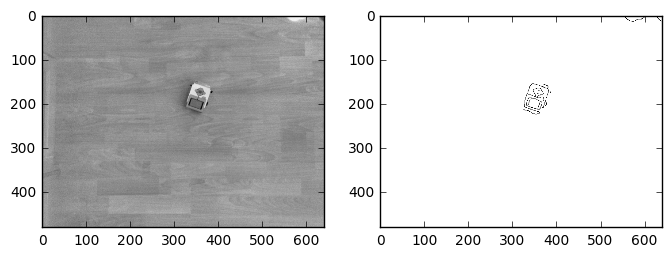

In [5]:
from skimage import feature
from skimage.measure import find_contours

edges = feature.canny(new, sigma=2)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))
ax1.imshow(new, cmap='Greys')
ax2.imshow(edges, cmap='Greys')

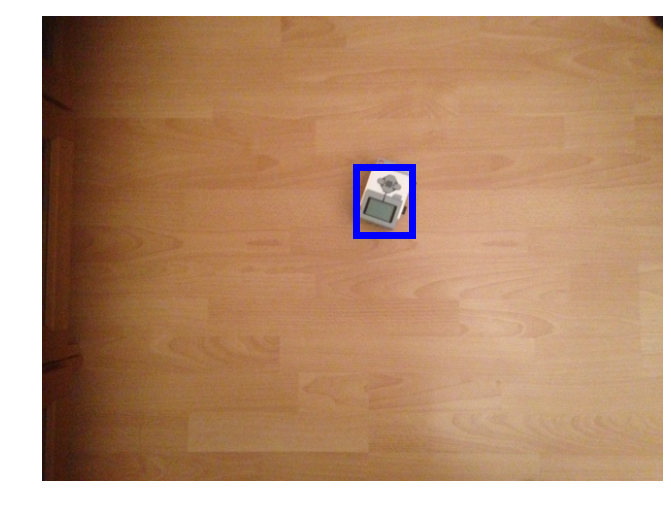

In [9]:
import matplotlib.patches as mpatches
from skimage import measure

label_image = measure.label(edges)
image_label_overlay = color.label2rgb(label_image)


fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(obj)

for region in measure.regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 200:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=3)
        ax.add_patch(rect)

ax.set_axis_off()
